# EDSA - Climate Change Belief Analysis 2022
© Explore Data Science Academy

---
### Honour Code

We {**Team 10**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Predict an individual’s belief in climate change based on historical tweet data


Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, we have created a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.
We aim to classify the tweets as pro, neutral, anti and news.This will help us get a better insight on the netizens beliefs in climate change. We got the data from [Explore Data Science Academy](https://www.kaggle.com/competitions/edsa-climate-change-belief-analysis-2022).
The major problem we faced classifying the data was imbalance. We explored the resampling methods to balance the data which could also cause an overfitting problem.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Feature Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Classifier Model Selection</a>

<a href=#seven>7. Model Explanations</a>

In [4]:
pip install comet_ml

  Using cached comet_ml-3.28.2-py2.py3-none-any.whl (342 kB)
  Using cached semantic_version-2.9.0-py2.py3-none-any.whl (15 kB)
  Using cached nvidia-ml-py3-7.352.0.tar.gz (19 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.9/481.9 KB 275.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 KB 331.3 kB/s eta 0:00:00a 0:00:01
  Using cached everett-3.0.0-py2.py3-none-any.whl (35 kB)
  Using cached requests_toolbelt-0.9.1-py2.py3-none-any.whl (54 kB)
  Using cached configobj-5.0.6.tar.gz (33 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19191 sha256=3644087c14215fce47690924b591d56ae1d1d5d2b24bb631ee442be9c5672eed
  Stored in directory: /Users/dianaokeyo/Library/Caches/pip/wheels/b9/b1/68/cb4feab29709d4155310d29a421389665dcab9eb3b679b527b
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=e

In [1]:
import comet_ml

In [2]:
from comet_ml import Experiment

In [3]:
experiment = Experiment("mmOpPSheJulnOrFlE3B5KW2e1")

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/deelianne/general/07a6dcc2646f4461b41dde8bc06d283b

COMET WARNING: Error exporting current conda environment


 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import nltk
import spacy
from nltk.tokenize import word_tokenize
import re
from sklearn import preprocessing as p
import nltk
from nltk import TreebankWordTokenizer, SnowballStemmer, PorterStemmer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, log_loss
nltk.download('averaged_perceptron_tagger')
from sklearn.svm import SVC
from nltk import pos_tag
from wordcloud import WordCloud
from tqdm.notebook import tqdm, trange
import itertools

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dianaokeyo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dianaokeyo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [5]:
#Read the train data and view the first few entries
df=pd.read_csv('train.csv')

In [6]:
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

**Exploratory data analysis (EDA)** is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily  provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate. 
The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.

[Source](https://www.ibm.com/cloud/learn/exploratory-data-analysis).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


We observed that our dataset has 3 columns and a total of 15,819 rows. We also observed the dataset contains two numerical varibles and one categorical variable. We also observed that the size of the data is 370.9+ KB.

In [8]:
df.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


From the dataset, we've been able to see the mean and a statistical summary of the dataset. We have also observed that the minimum value of the sentiment is **-1** while the maximum value is **2**

In [9]:
#Checking for null objects in train data
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

The dataset has no null values which means all entries were appropriately recorded.

In [10]:
#from copy import deepcopy
#eda = deepcopy(df)

In [10]:
sentiment_num2name = {
    -1: "Anti",
     0: "Neutral",
     1: "Pro",
     2: "News",
}
df["sentiment"] = df["sentiment"].apply(lambda num: sentiment_num2name[num])
df.head()

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


/Users/dianaokeyo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


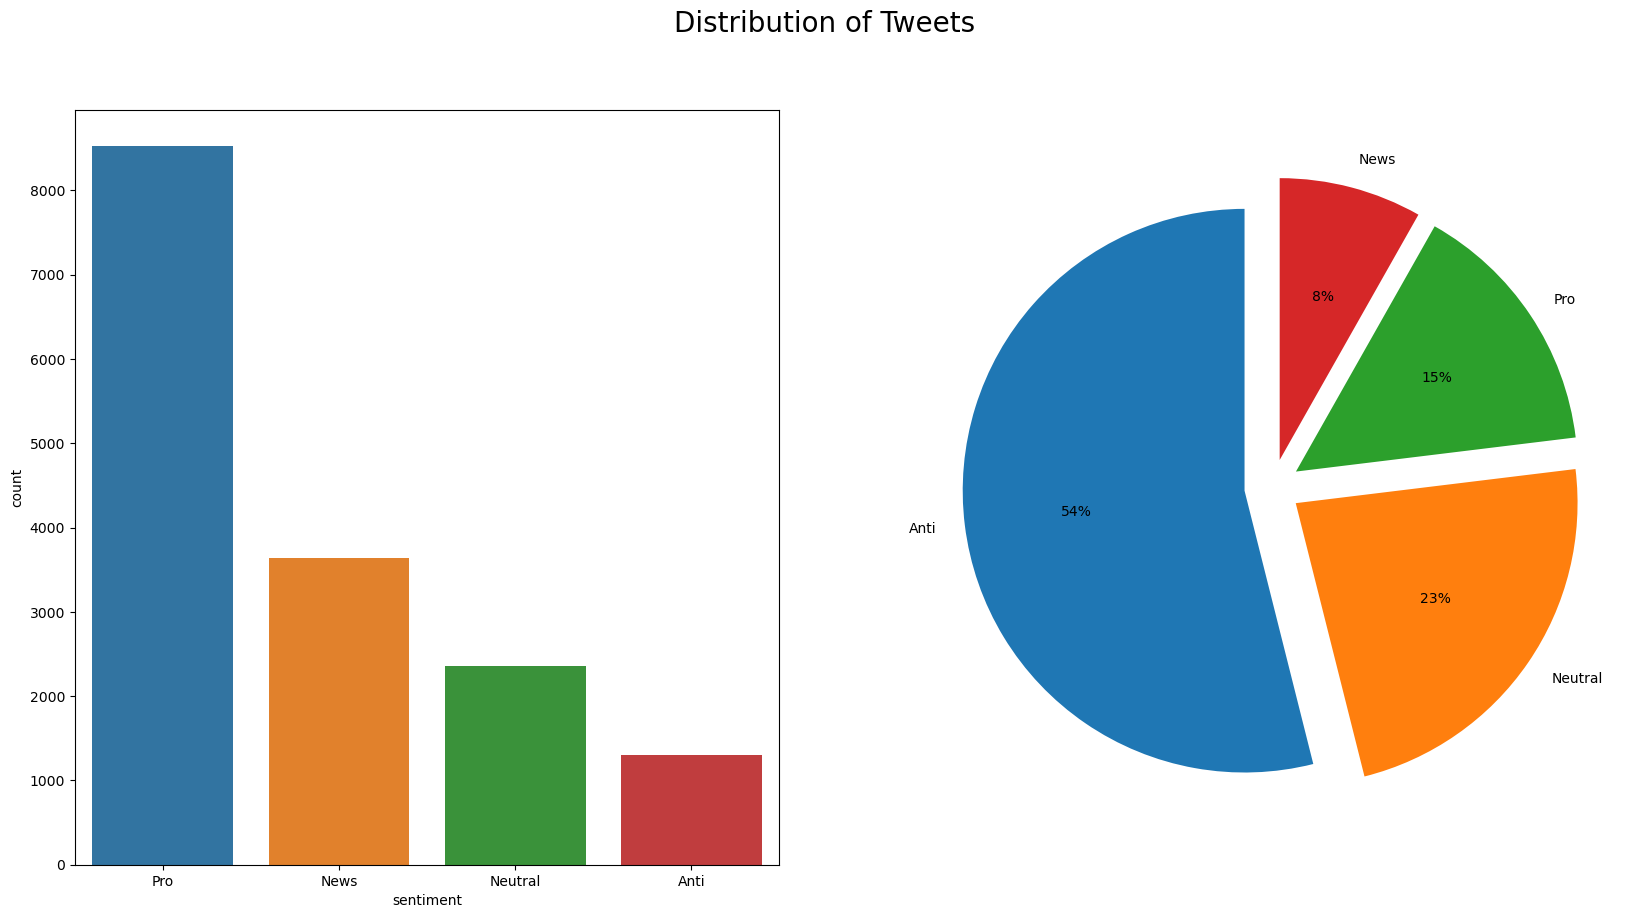

<Figure size 432x288 with 0 Axes>

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), dpi=100)

sns.countplot(df["sentiment"], ax=axes[0])
labels = list(sentiment_num2name.values())

axes[1].pie(df["sentiment"].value_counts(),
            labels=labels,
            autopct="%1.0f%%",
            startangle=90,
            explode=tuple([0.1] * len(labels)))

fig.suptitle("Distribution of Tweets", fontsize=20)
plt.show()
plt.savefig('Distribution of Tweets.png', dpi=300, bbox_inches='tight')

In [12]:
#Instantly make your loops show a smart progress meter
top15 = {}

by_sentiment = df.groupby("sentiment")
for sentiment, group in tqdm(by_sentiment):
    hashtags = group["message"].apply(lambda tweet: re.findall(r"#(\w+)", tweet))
    hashtags = itertools.chain(*hashtags)
    hashtags = [ht.lower() for ht in hashtags]
    
    frequency = nltk.FreqDist(hashtags)
    
    df_hashtags = pd.DataFrame({
        "hashtags": list(frequency.keys()),
        "counts": list(frequency.values()),
    })
    top15_htags = df_hashtags.nlargest(15, columns=["counts"])
    
    top15[sentiment] = top15_htags.reset_index(drop=True)

display(pd.concat(top15, axis=1).head(n=10))

  0%|          | 0/4 [00:00<?, ?it/s]

Anti                Neutral                     News         \
         hashtags counts        hashtags counts          hashtags counts   
0            maga     14         climate     19           climate    135   
1         climate     10   climatechange     15     climatechange     65   
2           trump      8           trump     12       environment     47   
3   climatechange      8  beforetheflood      5              news     32   
4   globalwarming      5           qanda      4             trump     25   
5        fakenews      4       amreading      4           science     18   
6    opchemtrails      4           cop22      4                p2     14   
7            tcot      4   globalwarming      3  greatbarrierreef     14   
8  parisagreement      4     parisaccord      3             cop22     14   
9           qanda      3   climatecounts      3    parisagreement      9   

               Pro         
          hashtags counts  
0          climate    188  
1   beforetheflood    148  
2    climatechange    120  
3  imvotingbecause     62  
4            cop22     59  
5   parisagreement     52  
6     actonclimate     49  
7            trump     43  
8                ã     37  
9    globalwarming     35

The table above shows the various hashtags used with different sentiments and with their counts. For example, the **climate hashtag** was frequently used with the Pro sentiment 

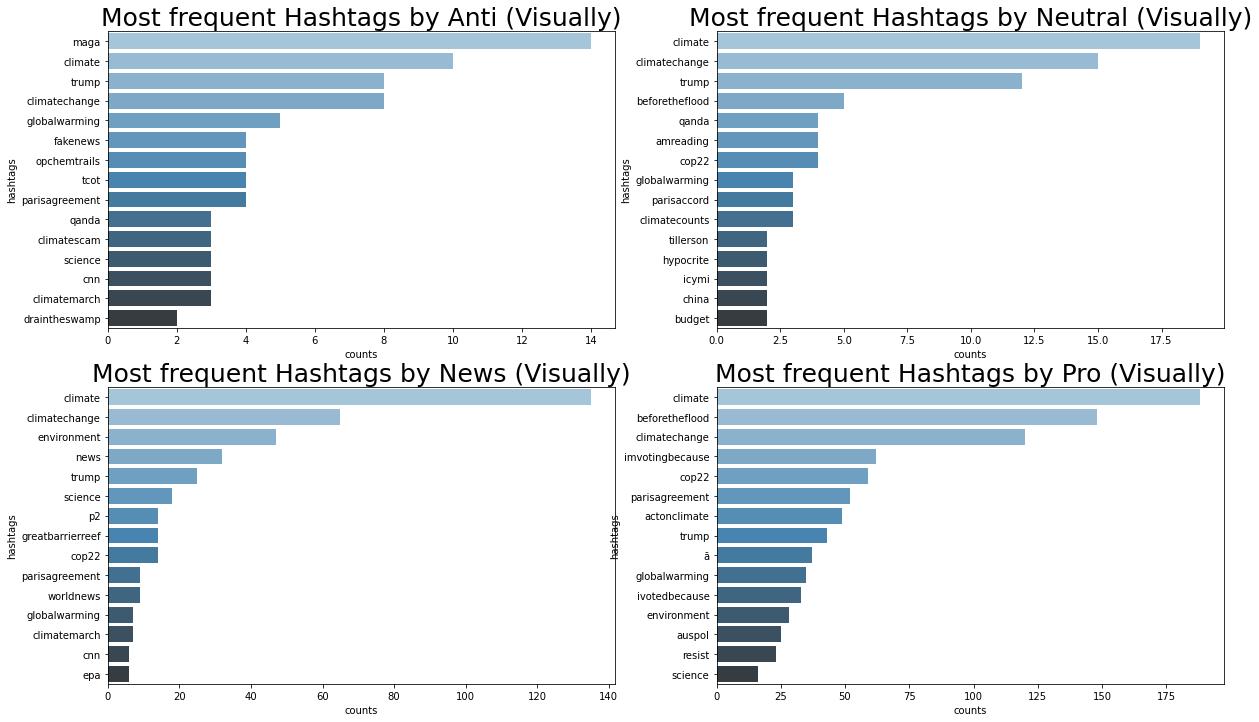

<Figure size 432x288 with 0 Axes>

In [13]:
#Plotting the frequently used hashtags with different sentiments
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
counter = 0

for sentiment, top in top15.items():
    sns.barplot(data=top, y="hashtags", x="counts", palette="Blues_d", ax=axes[counter // 2, counter % 2])
    axes[counter // 2, counter % 2].set_title(f"Most frequent Hashtags by {sentiment} (Visually)", fontsize=25)
    counter += 1
plt.show()
plt.savefig('Frequently Used Hashtags.png', dpi=300, bbox_inches='tight')

<a id="four"></a>
## 4. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

**The feature engineering** pipeline is the preprocessing steps that transform raw data into features that can be used in machine learning algorithms, such as predictive models. Predictive models consist of an outcome variable and predictor variables, and it is during the feature engineering process that the most useful predictor variables are created and selected for the predictive model. Feature engineering consists of creation, transformation, extraction, and selection of features, also known as variables, that are most conducive to creating an accurate ML algorithm. These processes entail:

Feature Creation: Creating features involves identifying the variables that will be most useful in the predictive model.  

Transformations: Transformation involves manipulating the predictor variables to improve model performance; e.g. ensuring the model is flexible in the variety of data it can ingest; ensuring variables are on the same scale, making the model easier to understand; improving accuracy; and avoiding computational errors by ensuring all features are within an acceptable range for the model. 

Feature Extraction: Feature extraction is the automatic creation of new variables by extracting them from raw data. The purpose of this step is to automatically reduce the volume of data into a more manageable set for modeling. Some feature extraction methods include cluster analysis, text analytics, edge detection algorithms, and principal components analysis.

Feature Selection: Feature selection algorithms essentially analyze, judge, and rank various features to determine which features are irrelevant and should be removed, which features are redundant and should be removed, and which features are most useful for the model and should be prioritized.
[Source](https://www.heavy.ai/technical-glossary/feature-engineering).

For the climate change belief tweet dataset, we engineered the data using mainly the feature transformations pipeline where we cleaned the data by removing punctuations, urls, made the text in a lower case, removed stop words, balanced the data using the resampling methods and removed the retweets.

## Cleaning the Text Dataset

Removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format. 
For this dataset, we will be:
making everything lower case
removing punctuation
removing emails and hashtags
removing urls or website links

In [14]:
#Defining a function to clean the text in the dataset
def cleaner(tweet):
    tweet = tweet.lower()
    
    to_del = [
        r"@[\w]*",  # strip account mentions
        r"http(s?):\/\/.*\/\w*",  # strip URLs
        r"#\w*",  # strip hashtags
        r"\d+",  # delete numeric values
        r"U+FFFD",  # remove the "character note present" diamond
    ]
    for key in to_del:
        tweet = re.sub(key, "", tweet)
    
    # strip punctuation and special characters
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", " ", tweet)
    # strip excess white-space
    tweet = re.sub(r"\s\s+", " ", tweet)
    
    return tweet.lstrip(" ")

In [15]:
#Applying the clean function to the message column of the dataset
df["message"] = df["message"].apply(cleaner)
df.head(10)

,sentiment,message,tweetid
0,Pro,polyscimajor epa chief doesn t think carbon di...,625221
1,Pro,it s not like we lack evidence of anthropogeni...,126103
2,News,rt researchers say we have three years to act ...,698562
3,Pro,wired was a pivotal year in the war on climate...,573736
4,Pro,rt it s and a racist sexist climate change den...,466954
5,Pro,worth a read whether you do or don t believe i...,425577
6,Pro,rt mike pence doesn’t believe in global warmin...,294933
7,Pro,rt six big things we can all do today to fight...,992717
8,Pro,my yo nephew is inconsolable he wants to die o...,664510
9,Pro,rt no offense… but like… how do you just not b...,260471


The resultant message column in the dataset has no Urls, no hashtags, account mentions, no whitespace, no numeric values and special characters removed too.

## Lemmatization, Tokenization and Parts-of-Speech

 Lemmatizing is the process of grouping words of similar meaning together. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.
Sometimes you will wind up with a very similar word, but other times you will wind up with a completely different word.

A tokeniser divides text into a sequence of tokens, which roughly correspond to "words". We will use tokenisers to clean up the data, making it ready for analysis.

Part of Speech Tagging is grammatical tagging or word-category disambiguation, is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech, based on both its definition and its context.

In [16]:
#Defining a lemmatization, tokenization and parts-of-speech function
def lemmatizer(lem):
    lem["length"] = lem["message"].str.len()
    lem["tokenized"] = lem["message"].apply(word_tokenize)
    lem["parts-of-speech"] = lem["tokenized"].apply(nltk.tag.pos_tag)
    
    def str2wordnet(tag):
        conversion = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, "R": wordnet.ADV}
        try:
            return conversion[tag[0].upper()]
        except KeyError:
            return wordnet.NOUN
    
    wnl = WordNetLemmatizer()
    lem["parts-of-speech"] = lem["parts-of-speech"].apply(
        lambda tokens: [(word, str2wordnet(tag)) for word, tag in tokens]
    )
    lem["lemmatized"] = lem["parts-of-speech"].apply(
        lambda tokens: [wnl.lemmatize(word, tag) for word, tag in tokens]
    )
    lem["lemmatized"] = lem["lemmatized"].apply(lambda tokens: " ".join(map(str, tokens)))
    
    return lem

In [17]:
#Applying the function to the dataset
df = lemmatizer(df)
df.head()

,sentiment,message,tweetid,length,tokenized,parts-of-speech,lemmatized
0,Pro,polyscimajor epa chief doesn t think carbon di...,625221,102,"[polyscimajor, epa, chief, doesn, t, think, ca...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief doesn t think carbon di...
1,Pro,it s not like we lack evidence of anthropogeni...,126103,62,"[it, s, not, like, we, lack, evidence, of, ant...","[(it, n), (s, v), (not, r), (like, n), (we, n)...",it s not like we lack evidence of anthropogeni...
2,News,rt researchers say we have three years to act ...,698562,86,"[rt, researchers, say, we, have, three, years,...","[(rt, n), (researchers, n), (say, v), (we, n),...",rt researcher say we have three year to act on...
3,Pro,wired was a pivotal year in the war on climate...,573736,54,"[wired, was, a, pivotal, year, in, the, war, o...","[(wired, v), (was, v), (a, n), (pivotal, a), (...",wire be a pivotal year in the war on climate c...
4,Pro,rt it s and a racist sexist climate change den...,466954,81,"[rt, it, s, and, a, racist, sexist, climate, c...","[(rt, v), (it, n), (s, n), (and, n), (a, n), (...",rt it s and a racist sexist climate change den...


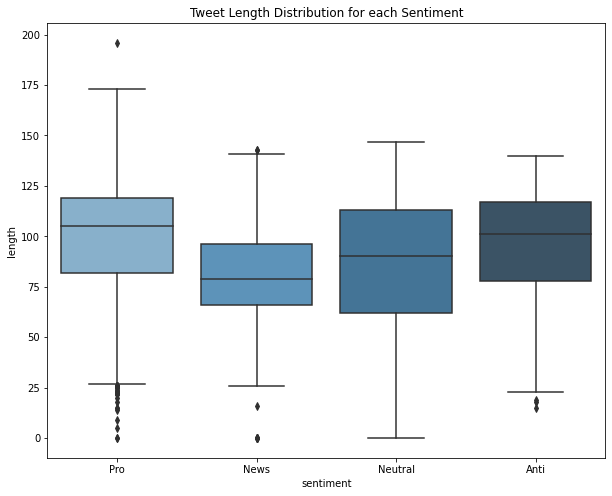

<Figure size 432x288 with 0 Axes>

In [18]:
#Plotting the tweet length distributions for each sentiment
plt.figure(figsize=(10, 8))
sns.boxplot(x="sentiment", y="length", data=df, palette=("Blues_d"))
plt.title("Tweet Length Distribution for each Sentiment")
plt.show()
plt.savefig('Tweet length distribution for each sentiment.png', dpi=300, bbox_inches='tight')

In [19]:
#Checking the count for the frequently used words in a message for each sentiment 
frequency = {}

by_sentiment = df.groupby("sentiment")
for sentiment, group in tqdm(by_sentiment):
    cv = CountVectorizer(stop_words="english")
    words = cv.fit_transform(group["lemmatized"])
    
    n_words = words.sum(axis=0)
    word_freq = [(word, n_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    
    freq = pd.DataFrame(word_freq, columns=["word", "freq"])
    
    frequency[sentiment] = freq.head(n=25)

to_view = pd.concat(frequency, axis=1).head(n=25)
display(to_view)

  0%|          | 0/4 [00:00<?, ?it/s]

Anti       Neutral             News              Pro      
         word freq     word  freq       word  freq       word  freq
0     climate  799  climate  1431     change  3264     change  7249
1      change  786   change  1419    climate  3212    climate  7202
2          rt  684       rt  1092         rt  2150         rt  5793
3      global  639   global  1038      trump  1029     global  1605
4     warming  489  warming   861     global   509    warming  1196
5        warm  133    trump   170    warming   345    believe  1115
6        make  109     warm   168        say   336      trump  1052
7         man   96      say   141        epa   254      think   809
8         amp   91    think   120  scientist   214      doesn   710
9     science   81    cause   113        new   192        amp   695
10      cause   73      amp   112      fight   186       real   518
11        say   69  believe   104     donald   165      world   491
12       just   68     like   102      world   156        say   480
13       real   65     real    99      china   156     people   467
14  scientist   64     just    94      obama   130        die   420
15       year   64  penguin    86  president   120  president   409
16      trump   62     know    71     pruitt   118      fight   396
17     people   58   people    69       plan   113     denier   376
18    believe   58     talk    69      scott   113       just   372
19       scam   54     make    69      paris   108        don   364
20        tax   51      don    68      study   102       http   359
21       hoax   51     tell    66      chief   102       make   322
22       data   50      ask    59     energy   102       like   318
23    liberal   48      hot    53       warm    99       warm   313
24       fake   47     come    51        use    95    husband   312

  0%|          | 0/4 [00:00<?, ?it/s]

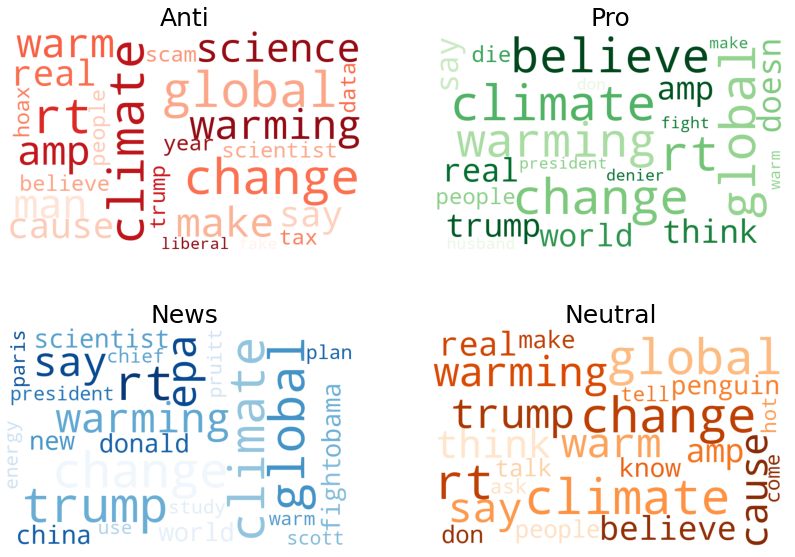

<Figure size 432x288 with 0 Axes>

In [20]:
#Performing a word cloud
words = {sentiment: " ".join(frequency[sentiment]["word"].values) for sentiment in sentiment_num2name.values()}

cmaps = {
    "Anti": ("Reds", 110),
    "Pro" : ("Greens", 73),
    "News": ("Blues", 0),
    "Neutral": ("Oranges", 10),
}



wordclouds = {}
for sentiment, (cmap, rand) in tqdm(cmaps.items()):
    wordclouds[sentiment] = WordCloud(
        width=800, height=500, random_state=rand,
        max_font_size=110, background_color="white",
        colormap=cmap
    ).generate(words[sentiment])
    
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
counter = 0

for sentiment, wordcloud in wordclouds.items():
    axes[counter // 2, counter % 2].imshow(wordcloud)
    axes[counter // 2, counter % 2].set_title(sentiment, fontsize=25)
    counter += 1
    
for ax in fig.axes:
    plt.sca(ax)
    plt.axis("off")

plt.show()
fig.tight_layout()
#plt.savefig('wordcloud for each sentiment.png', dpi=300)
plt.savefig('wordcloud2.png', dpi=300, bbox_inches='tight')

**Word Clouds** (also known as wordle, word collage or tag cloud) are visual representations of words that give greater prominence to words that appear more frequently. We did a wordcloud to visually observe the prominet words for each sentiment.

In [21]:
df.head()

,sentiment,message,tweetid,length,tokenized,parts-of-speech,lemmatized
0,Pro,polyscimajor epa chief doesn t think carbon di...,625221,102,"[polyscimajor, epa, chief, doesn, t, think, ca...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief doesn t think carbon di...
1,Pro,it s not like we lack evidence of anthropogeni...,126103,62,"[it, s, not, like, we, lack, evidence, of, ant...","[(it, n), (s, v), (not, r), (like, n), (we, n)...",it s not like we lack evidence of anthropogeni...
2,News,rt researchers say we have three years to act ...,698562,86,"[rt, researchers, say, we, have, three, years,...","[(rt, n), (researchers, n), (say, v), (we, n),...",rt researcher say we have three year to act on...
3,Pro,wired was a pivotal year in the war on climate...,573736,54,"[wired, was, a, pivotal, year, in, the, war, o...","[(wired, v), (was, v), (a, n), (pivotal, a), (...",wire be a pivotal year in the war on climate c...
4,Pro,rt it s and a racist sexist climate change den...,466954,81,"[rt, it, s, and, a, racist, sexist, climate, c...","[(rt, v), (it, n), (s, n), (and, n), (a, n), (...",rt it s and a racist sexist climate change den...


## Class Imbalance - Resampling Methods

Class imbalance occurs when the number of observations across different class labels are unevenly distributed. From our dataset, the pro sentiments had a higher count (>8000) and the anti sentiment had a lower count (<2000). In training our classification model, it is preferable for all classes to have a relatively even split of observations. However, our classification dataset often came with unevenly distributed observations with one class having way more observations than others.

**Resampling**
Resampling methods involve modifying the number of observations in each class as follows:

Downsampling - taking a random subset of the majority class small enough to match the number of observations in the minority class.

Upsampling - taking repeated random samples from the minority class until we have as many observations as the majority class. This grows the size of the minority class by effectively duplicating observations at random.

We upsampled our dataset to match the Pro sentiments which means we had more data but ended up with a balanced data.

<AxesSubplot:xlabel='sentiment', ylabel='count'>

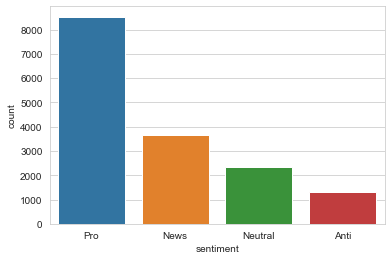

In [22]:
#Before balancing our data
sns.set_style('whitegrid')
sns.countplot(x='sentiment', data=df)

In [23]:
#Separate minority and majority classes and name the sentiments
News=df[df['sentiment']=='News']
Pro=df[df['sentiment']=='Pro']
Neutral=df[df['sentiment']=='Neutral']
Anti=df[df['sentiment']=='Anti']

In [24]:
#Checking the lengths of all target values
len(News), len(Pro), len(Neutral), len(Anti)

(3640, 8530, 2353, 1296)

With the varying target lengths, we discovered the data is imbalanced. We will balance the data using the upward resampling method

In [25]:
#Upsample the leading sentiment
def sampling(x, y, z):
    News_upsampled = resample(x,
                              replace=True, # sample without replacement (no need to duplicate observations)
                              n_samples=len(Pro), # match number in minority class
                              random_state=27) # reproducible results
    Neutral_upsampled = resample(y,
                              replace=True, # sample without replacement (no need to duplicate observations)
                              n_samples=len(Pro), # match number in minority class
                              random_state=27) # reproducible results
    Anti_upsampled = resample(z,
                              replace=True, # sample without replacement (no need to duplicate observations)
                              n_samples=len(Pro), # match number in minority class
                              random_state=27) # reproducible results

    # Combine downsampled majority class with minority class
    final_downsampled = pd.concat([News_upsampled, Neutral_upsampled, Anti_upsampled, Pro])
    return final_downsampled

In [26]:
df1=sampling(News,Neutral,Anti)

In [27]:
df1

,sentiment,message,tweetid,length,tokenized,parts-of-speech,lemmatized
4401,News,should canada go ahead with a carbon tax when ...,634603,103,"[should, canada, go, ahead, with, a, carbon, t...","[(should, n), (canada, v), (go, v), (ahead, r)...",should canada go ahead with a carbon tax when ...
11162,News,rt interior scientist says the agency retaliat...,793130,96,"[rt, interior, scientist, says, the, agency, r...","[(rt, n), (interior, a), (scientist, n), (says...",rt interior scientist say the agency retaliate...
3062,News,rt senator malcolm roberts to breitbart on cli...,990850,124,"[rt, senator, malcolm, roberts, to, breitbart,...","[(rt, n), (senator, n), (malcolm, n), (roberts...",rt senator malcolm robert to breitbart on clim...
5669,News,rt for the third year in a row the carbon diox...,418438,113,"[rt, for, the, third, year, in, a, row, the, c...","[(rt, n), (for, n), (the, n), (third, a), (yea...",rt for the third year in a row the carbon diox...
13403,News,rt john kerry leaves nz for mcmurdo amp south ...,29803,126,"[rt, john, kerry, leaves, nz, for, mcmurdo, am...","[(rt, n), (john, n), (kerry, n), (leaves, v), ...",rt john kerry leave nz for mcmurdo amp south p...
...,...,...,...,...,...,...,...
15807,Pro,climate change comments would be like nasa say...,447067,121,"[climate, change, comments, would, be, like, n...","[(climate, n), (change, n), (comments, n), (wo...",climate change comment would be like nasa say ...
15811,Pro,rt she s thinking about how she s going to die...,426353,108,"[rt, she, s, thinking, about, how, she, s, goi...","[(rt, n), (she, n), (s, v), (thinking, v), (ab...",rt she s think about how she s go to die becau...
15812,Pro,rt hottest year in history also in members of ...,989478,86,"[rt, hottest, year, in, history, also, in, mem...","[(rt, n), (hottest, a), (year, n), (in, n), (h...",rt hot year in history also in member of congr...
15813,Pro,rt epa head falsely claims carbon emissions ar...,442853,80,"[rt, epa, head, falsely, claims, carbon, emiss...","[(rt, n), (epa, n), (head, n), (falsely, r), (...",rt epa head falsely claim carbon emission aren...


In [28]:
# Check new class counts
df1['sentiment'].value_counts()

News       8530
Anti       8530
Pro        8530
Neutral    8530
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

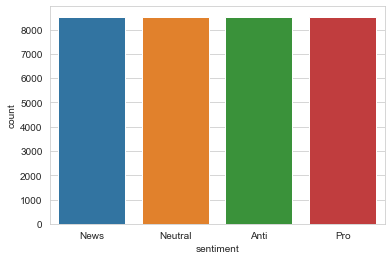

In [29]:
#After balancing the data
sns.set_style('whitegrid')
sns.countplot(x='sentiment', data=df1)

We upscaled the data to balance with the Pro sentiments.

<a id="five"></a>
## 5. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

A Machine Learning model is a program that has been trained to find patterns within new data and make predictions. These models are represented as a mathematical function that takes requests in the form of input data, makes predictions on input data, and then provides an output in response. First, these models are trained over a set of data, and then they are provided an algorithm to reason over data, extract the pattern from feed data and learn from those data. Once these models get trained, they can be used to predict the unseen dataset.

In [30]:
#Defining the X and y variables for modelling
X=df1['lemmatized']
y=df1['sentiment']

We split our Train data set into 80% train data and 20% test data. The train data would enable us build our model and the test data would enable our trained model to understand any unseen data.

In [31]:
#Splitting the data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

We decided to start our building our model with TfidfVectorizer. Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector. It combines 2 concepts, Term Frequency (TF) and Document Frequency (DF).

In [32]:
vect = TfidfVectorizer(stop_words = 'english', max_df=0.9, ngram_range=(2, 6), analyzer= 'char')
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [33]:
#Classifying with the multinomial bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print("The accuracy score of the MNB is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred))

The accuracy score of the MNB is: 0.7886869871043376


Classification Report:

               precision    recall  f1-score   support

        Anti       0.78      0.95      0.85      1671
     Neutral       0.88      0.67      0.76      1722
        News       0.80      0.84      0.82      1707
         Pro       0.72      0.71      0.72      1724

    accuracy                           0.79      6824
   macro avg       0.79      0.79      0.79      6824
weighted avg       0.79      0.79      0.79      6824



**Multinomial Bayes Classifier**
It is used for discrete counts. For example, let’s say, we have a text classification problem. Here we can consider bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

We get an accuracy f1-score of 0.88.

In [34]:
#Classifying with logistic regression
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)
y_pred_L = clf_log.predict(X_test)

print("The accuracy score of the log is:", accuracy_score(y_test, y_pred_L))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred_L))

/Users/dianaokeyo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy score of the log is: 0.8884818288393904


Classification Report:

               precision    recall  f1-score   support

        Anti       0.92      0.98      0.95      1671
     Neutral       0.88      0.90      0.89      1722
        News       0.87      0.93      0.90      1707
         Pro       0.87      0.75      0.81      1724

    accuracy                           0.89      6824
   macro avg       0.89      0.89      0.89      6824
weighted avg       0.89      0.89      0.89      6824



**Logistic Regression** makes use of a common S-shaped curve known as the logistic function. This curve is commonly known as a sigmoid. It solves the problem for the following reasons:
It squeezes the range of output values to exist only between 0 and 1.
It has a point of inflection, which can be used to separate the feature space into two distinct areas (one for each class).
It has shallow gradients at both its top and bottom, which can be mapped to zeroes or ones respectively with little ambiguity.

In [35]:
#Classifying with gaussion bernoulli
gnb = BernoulliNB()
gnb.fit(X_train, y_train)
y_pred_B = gnb.predict(X_test)

print("The accuracy score of the GNB is:", accuracy_score(y_test, y_pred_B))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred_B))

The accuracy score of the GNB is: 0.8036342321219226


Classification Report:

               precision    recall  f1-score   support

        Anti       0.90      0.90      0.90      1671
     Neutral       0.81      0.76      0.79      1722
        News       0.74      0.88      0.80      1707
         Pro       0.78      0.67      0.72      1724

    accuracy                           0.80      6824
   macro avg       0.81      0.80      0.80      6824
weighted avg       0.81      0.80      0.80      6824



**Gaussian** It is used in classification and it assumes that features follow a normal distribution. We get an accuracy f1-score of 0.80

In [36]:
#Classifying with support vector classifier
svc = SVC(kernel='rbf', C=12)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred))

The accuracy score of the SVC is: 0.9535463071512309


Classification Report:

               precision    recall  f1-score   support

        Anti       0.99      0.99      0.99      1671
     Neutral       0.97      0.96      0.96      1722
        News       0.93      0.96      0.95      1707
         Pro       0.92      0.90      0.91      1724

    accuracy                           0.95      6824
   macro avg       0.95      0.95      0.95      6824
weighted avg       0.95      0.95      0.95      6824



**Support vector classifier** algorithm is to find a hyperplane in the N-dimensional space (N is the number of features) that distinctively classifies the data points. The objective is to find a plane that has the maximum margin i.e the maximum distance between data points of both classes.

## Prediction with unseen data

In [37]:
#Loading test data
test_df =pd.read_csv('test_with_no_labels.csv') # load the data
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [38]:
#Assigning values to tweetid
tweetid = test_df.tweetid.values

## Cleaning the unseen data - test data

In [39]:
#Applying the text clean function on the test data
test_df["message"] = test_df["message"].apply(cleaner)

In [40]:
#Applying the lemmatization, tokenization and parts-of-speech function to test data
test_df = lemmatizer(test_df)

In [41]:
test_df.head(3)

,message,tweetid,length,tokenized,parts-of-speech,lemmatized
0,europe will now be looking to china to make su...,169760,98,"[europe, will, now, be, looking, to, china, to...","[(europe, n), (will, n), (now, r), (be, v), (l...",europe will now be look to china to make sure ...
1,combine this with the polling of staffers re c...,35326,107,"[combine, this, with, the, polling, of, staffe...","[(combine, n), (this, n), (with, n), (the, n),...",combine this with the polling of staffer re cl...
2,the scary unimpeachable evidence that climate ...,224985,69,"[the, scary, unimpeachable, evidence, that, cl...","[(the, n), (scary, a), (unimpeachable, a), (ev...",the scary unimpeachable evidence that climate ...


In [42]:
#using the fitted vocabulary to build a document-term matrix from the data.
test_x_vecs = vect.transform(X)

<a id="six"></a>
## 6. Classifier Model Selection
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

Based on how the models performed on the train dataset, we classified the test data with the support vector classifier, logistic regression and GnB. The support vector classifier performed well with the train data and we applied the same on the test data

In [43]:
#Modelling the test data with support vector classifier
y_pred_s = svc.predict(test_x_vecs)

In [44]:
#Modeling the test data with the logistric regression classifier
y_pred_L = clf_log.predict(test_x_vecs)

In [45]:
#Modelling the test data with gnb classifier
y_pred_b = gnb.predict(test_x_vecs)

## Kaggle Submission

For the submissio we used the predictions made with the support vector classifier, with the tweetid and sentiment as columns.

In [46]:
submission = pd.DataFrame(list(zip(tweetid, y_pred_s)), columns = ['tweetid','sentiment'])
submission.head()

,tweetid,sentiment
0,169760,News
1,35326,News
2,224985,News
3,476263,News
4,872928,News


In [47]:
submission.shape

(10546, 2)

In [48]:
#submission.to_csv('New submission1.csv', index_label = False, index = False)

In [49]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/deelianne/general/07a6dcc2646f4461b41dde8bc06d283b
COMET INFO:   Parameters:
COMET INFO:     C                       : 12
COMET INFO:     alpha                   : 1.0
COMET INFO:     binarize                : 0.0
COMET INFO:     break_ties              : False
COMET INFO:     cache_size              : 200
COMET INFO:     class_prior             : 1
COMET INFO:     class_weight            : 1
COMET INFO:     coef0                   : 0.0
COMET INFO:     decision_function_shape : ovr
COMET INFO:     degree                  : 3
COMET INFO:     dual                    : False
COMET INFO:     fit_intercept           : True
COMET INFO:     fit_prior               : True
COMET INFO:     gamma                   : scale
COMET INFO:     intercept_scaling  

## Creating files to use for the streamlit app

In [52]:
import pickle
model_save_path = "SVC.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(y_pred_s,file)

In [53]:
model_save_path = "gnb.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(y_pred_b,file)

In [54]:
model_save_path = "log_regression.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(y_pred_L,file)